# Description

It reads outputs from sex discrepancy previosly computed, and plots the inbreeding coefficient (https://www.cog-genomics.org/plink/1.9/formats#sexcheck) for samples to know whether self-reported sex and imputed sex from X chromosome match.

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Paths

In [2]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [3]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [4]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [5]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

# Load data

In [6]:
gender <- read.table(file.path(SUBSETS_DIR, "all_phase3.1.split_x.sexcheck.sexcheck"), header=T,as.is=T)

In [7]:
dim(gender)

[1] 2504    6

In [8]:
head(gender)

,FID,IID,PEDSEX,SNPSEX,STATUS,F
,<int>,<chr>,<int>,<int>,<chr>,<dbl>
1,0,HG00096,1,1,OK,1.0000
2,0,HG00097,2,0,PROBLEM,0.2480
3,0,HG00099,2,0,PROBLEM,0.2294
4,0,HG00100,2,2,OK,0.1537
5,0,HG00101,1,1,OK,1.0000
6,0,HG00102,2,2,OK,0.1916


# Histogram

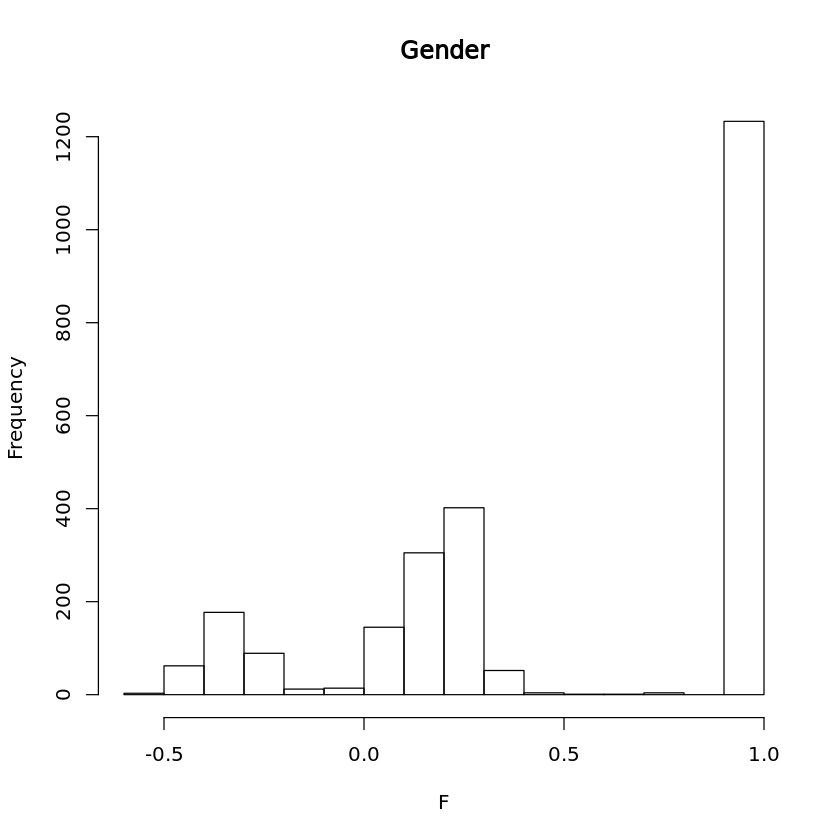

In [9]:
hist(gender[,6],main="Gender", xlab="F")

In [10]:
gender %>% summarise(mean = mean(F), sd = sd(F), max = max(F), min = min(F))

mean,sd,max,min
<dbl>,<dbl>,<dbl>,<dbl>
0.5167192,0.5082851,1,-0.589


In [11]:
gender %>%
  filter(F < 0.20) %>%
  dim_desc()

[1] "[807 x 6]"

In [12]:
gender %>%
  filter(F < 0.21) %>%
  dim_desc()

[1] "[845 x 6]"

In [13]:
gender %>%
  filter(F < 0.22) %>%
  dim_desc()

[1] "[896 x 6]"

In [14]:
gender %>%
  filter(F < 0.23) %>%
  dim_desc()

[1] "[962 x 6]"

In [15]:
gender %>%
  filter(F < 0.24) %>%
  dim_desc()

[1] "[1,003 x 6]"

In [16]:
gender %>%
  filter(F < 0.25) %>%
  dim_desc()

[1] "[1,062 x 6]"

In [17]:
gender %>%
  filter(F > 0.80) %>%
  dim_desc()

[1] "[1,233 x 6]"

In [18]:
gender %>%
  filter(STATUS == "PROBLEM") %>%
  dim_desc()

[1] "[464 x 6]"

In the next script (`03_15-qc-sex_discrepancy-remove.sh`) I choose a cutoff for `F` based on these analyses.